## 載入模型和權重

In [1]:
import os
import clip
import torch

device = torch.device("cpu")
model, preprocess = clip.load("ViT-L/14@336px", device)

## 載入選擇的圖片

Please enter the image name: cat.jpg


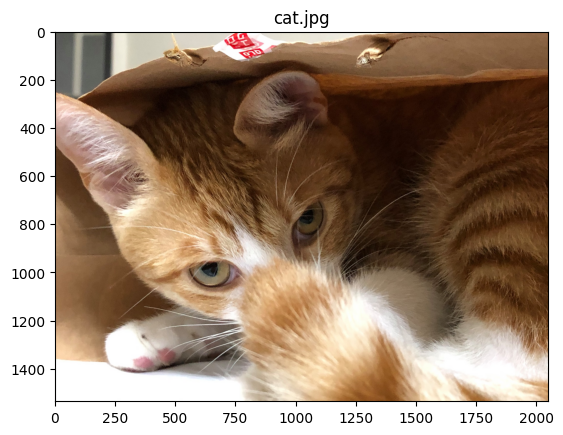

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

while True:
    try:
        image_name = input("Please enter the image name:")
        image = Image.open(image_name)
        break
    except:
        print("Can't find the image file. Please enter again.")

plt.imshow(image)
plt.title("{}".format(image_name))
plt.show()

image_input = preprocess(image).unsqueeze(0).to(device)

## 輸入的不同文字描述並給予匹配分數，並確認是否匹配

In [3]:
def clip_score(image_features, text_features):
    score = (100 * torch.nn.functional.cosine_similarity(image_features, text_features)).item()
    score = max(score, 0)
    return score

descriptions, scores = list(), list()
while True:
    desc = input("Please enter the description:")
    if desc == "finish":
        break
    descriptions.append(desc)
    text_input = clip.tokenize([desc]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)
    score = clip_score(image_features, text_features)
    print("The match score is {:.2f}. ".format(score), end = "")
    if score < 20:
        print("The description doesn't match the image")
    else:
        print("The description matches the image")
    scores.append(score)

Please enter the description: A orange cat in the paper bag is looking at you.


The match score is 28.53. The description matches the image


Please enter the description: A CS student write the python code for deep learning homework.


The match score is 16.55. The description doesn't match the image


Please enter the description: Our respected teacher, Richard Lin, teaches the computer network.


The match score is 10.15. The description doesn't match the image


Please enter the description: finish


## 輸出不同的描述的符合機率

In [4]:
text_input = clip.tokenize(descriptions).to(device)
with torch.no_grad():
    logits_per_image, logits_per_text = model(image_input, text_input)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()[0]

for d, p in zip(descriptions, probs):
    print("{:>6.2f}% -> {}".format(p * 100, d))

100.00% -> A orange cat in the paper bag is looking at you.
  0.00% -> A CS student write the python code for deep learning homework.
  0.00% -> Our respected teacher, Richard Lin, teaches the computer network.
